In [3]:
import pynq.lib.dma
import numpy as np
dftol = pynq.Overlay("./src/fft/fft.bit")

dma0 = dftol.axi_dma_0
dma1 = dftol.axi_dma_1


from pynq import Xlnk
xlnk = Xlnk()
samplereal = xlnk.cma_array(shape=(1024,), dtype=np.float)
sampleimag = xlnk.cma_array(shape=(1024,), dtype=np.float)
outreal = xlnk.cma_array(shape=(1024,), dtype=np.float)
outimag = xlnk.cma_array(shape=(1024,), dtype=np.float)

for i in range(1024):
    samplereal[i] = i

for j in range(1024):
    sampleimag[j] = 0
   
dma0.sendchannel.transfer(samplereal)
dma1.sendchannel.transfer(sampleimag)
dma0.recvchannel.transfer(outreal)
dma1.recvchannel.transfer(outimag)
print(outreal)
print(outimag)

[-6.35797575e+14 -2.02136454e+11 -1.22271478e+10 ...  6.08481460e-56
  3.53695122e-53 -5.53954517e-79]
[1.60955566e+02 5.98436356e+01 6.94320222e+01 ... 6.88452640e-63
 1.43055084e-61 2.01207879e-67]


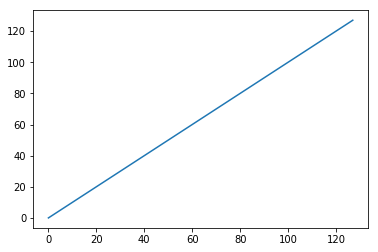

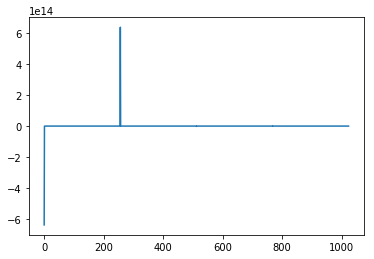

In [5]:
import pylab as py
import scipy as scipy
import matplotlib.pyplot as plt
import scipy.fftpack
import numpy.fft

actualreal = samplereal[0:128]
fig1 = plt.figure()
ax1 = fig1.gca()
plt.plot(actualreal)

fig2 = plt.figure()
ax2 = fig2.gca()

plt.plot(outreal)